# 04_Fast

In [1]:
import numpy as np
import random
import torch
torch.cuda.set_device(0)

In [2]:
random_seed = 617
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)
print("Random Seed:",random_seed)

Random Seed: 617


In [3]:
# Import utils from a specific defense
from defenses.base.loader import get_loader
from defenses.base.model import get_model
from defenses.fast.train import Trainer, get_acc

Loader : Base
Model : Base
Train : Fast


In [4]:
# Set Name
NAME = "04_Fast"

## 1. Train

In [5]:
# Get Train, Test datasets
train_loader_ns, _ = get_loader(shuffle_train=False)
train_loader, test_loader = get_loader(shuffle_train=True)

# Get Model
model = get_model().cuda()

Files already downloaded and verified
Files already downloaded and verified
Data Loaded!
Train Data Length : 50000
Test Data Length : 10000
Files already downloaded and verified
Files already downloaded and verified
Data Loaded!
Train Data Length : 50000
Test Data Length : 10000
WRN-28 is loaded.


In [6]:
train_sets = iter(train_loader_ns).next()
test_sets = iter(test_loader).next()

In [7]:
# Train Model
trainer = Trainer(model, train_sets, test_sets,
                  eps=8/255, alpha=10/255)
trainer.train(train_loader, epochs=200,
              save_path="./_models/"+NAME,
              record_type="Epoch", save_type="Epoch")

Train Information:
-Epochs: 200
-Optimizer: SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.1
    lr: 0.1
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0005
)
-Scheduler: <torch.optim.lr_scheduler.MultiStepLR object at 0x7f38a1b247b8>
-Save Path: ./_models/04_Fast
-Save Type: Per Epoch
-Record Type: Per Epoch
-Device: cuda
--------------------------------------------------------------------------------------------------------------------------
Epoch   Loss     Acc       Clean(Tr)   FGSM(Tr)   PGD(Tr)   GN(Tr)    Clean(Te)   FGSM(Te)   PGD(Te)   GN(Te)    lr       
1       2.0628   22.5020   33.5938     20.3125    21.0938   32.8125   42.1875     31.2500    31.2500   40.6250   0.1000   
--------------------------------------------------------------------------------------------------------------------------
2       1.8903   28.4295   48.4375     27.3438    24.2188   49.2188   53.9062     29.6875    28.1250   53.1250   0.1000   
-------------------------------------

32      1.2248   54.1747   83.5938     53.9062    46.8750   76.5625   76.5625     46.0938    37.5000   78.1250   0.1000   
--------------------------------------------------------------------------------------------------------------------------
33      1.2199   54.4391   80.4688     50.0000    45.3125   75.0000   78.9062     43.7500    35.9375   71.0938   0.1000   
--------------------------------------------------------------------------------------------------------------------------
34      1.2079   54.8798   82.0312     58.5938    50.0000   67.9688   75.0000     46.0938    37.5000   60.9375   0.1000   
--------------------------------------------------------------------------------------------------------------------------
35      1.1226   58.8982   80.4688     53.9062    43.7500   73.4375   78.1250     47.6562    40.6250   75.0000   0.1000   
--------------------------------------------------------------------------------------------------------------------------
36      0.9033  

66      0.8023   69.6514   93.7500     71.0938    62.5000   81.2500   89.0625     59.3750    46.0938   76.5625   0.0200   
--------------------------------------------------------------------------------------------------------------------------
67      0.6922   74.0625   92.9688     62.5000    55.4688   83.5938   85.1562     51.5625    40.6250   82.8125   0.0200   
--------------------------------------------------------------------------------------------------------------------------
68      0.8258   68.3974   89.0625     70.3125    59.3750   82.8125   83.5938     50.0000    45.3125   77.3438   0.0200   
--------------------------------------------------------------------------------------------------------------------------
69      0.7905   69.8618   93.7500     74.2188    66.4062   87.5000   83.5938     49.2188    41.4062   77.3438   0.0200   
--------------------------------------------------------------------------------------------------------------------------
70      0.6473  

100     0.0483   98.5537   78.1250     96.0938    0.0000    50.7812   70.3125     95.3125    0.0000    40.6250   0.0200   
--------------------------------------------------------------------------------------------------------------------------
101     0.1196   96.2520   73.4375     88.2812    0.0000    60.1562   71.0938     88.2812    0.7812    53.9062   0.0200   
--------------------------------------------------------------------------------------------------------------------------
102     0.2176   92.8245   75.0000     96.0938    0.7812    50.0000   71.8750     95.3125    0.0000    52.3438   0.0200   
--------------------------------------------------------------------------------------------------------------------------
103     0.8696   67.7925   85.9375     55.4688    46.8750   80.4688   81.2500     51.5625    45.3125   81.2500   0.0200   
--------------------------------------------------------------------------------------------------------------------------
104     1.1351  

134     0.0967   96.6266   100.0000    100.0000   42.9688   90.6250   89.0625     85.1562    27.3438   68.7500   0.0040   
--------------------------------------------------------------------------------------------------------------------------
135     0.0392   98.8522   100.0000    100.0000   38.2812   88.2812   86.7188     87.5000    25.7812   71.0938   0.0040   
--------------------------------------------------------------------------------------------------------------------------
136     0.0229   99.3930   100.0000    100.0000   27.3438   95.3125   87.5000     94.5312    18.7500   75.7812   0.0040   
--------------------------------------------------------------------------------------------------------------------------
137     0.0158   99.6134   100.0000    100.0000   32.8125   94.5312   87.5000     94.5312    17.1875   78.1250   0.0040   
--------------------------------------------------------------------------------------------------------------------------
138     0.0140  

168     0.0028   99.9800   100.0000    100.0000   27.3438   87.5000   89.0625     96.0938    14.0625   80.4688   0.0008   
--------------------------------------------------------------------------------------------------------------------------
169     0.0027   99.9840   100.0000    100.0000   21.8750   92.1875   90.6250     96.8750    11.7188   75.7812   0.0008   
--------------------------------------------------------------------------------------------------------------------------
170     0.0025   99.9900   100.0000    100.0000   21.0938   88.2812   90.6250     96.8750    11.7188   77.3438   0.0008   
--------------------------------------------------------------------------------------------------------------------------
171     0.0027   99.9860   100.0000    100.0000   20.3125   89.8438   87.5000     96.8750    12.5000   80.4688   0.0008   
--------------------------------------------------------------------------------------------------------------------------
172     0.0024  

In [8]:
trainer.save_all("./_models/"+NAME)

...Saved as csv to ./_models/04_Fast.csv !


In [9]:
print("Final Test Acc : %2.2f"%get_acc(model, test_loader))

Final Test Acc : 88.80


## 2. Record Visualization

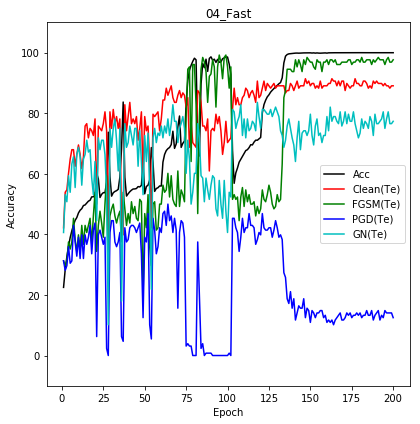

In [19]:
# Plot Train and Test Accuracy
trainer.rm.plot(title=NAME, xlabel="Epoch", ylabel="Accuracy", ylabel_second="Loss",
                x_key='Epoch', y_keys=['Acc', 'Clean(Te)', 'FGSM(Te)', 'PGD(Te)', 'GN(Te)'],
                ylim=(-10, 110), colors=['k', 'r', 'g', 'b', 'c'])

## 3. White Box Attack

In [11]:
import torchattacks
from torchattacks import FGSM, PGD, MultiAttack

In [12]:
model.load_state_dict(torch.load("./_models/"+NAME+".pth"))
model = model.cuda().eval()

### 3.1 FGSM

In [13]:
fgsm = FGSM(model, eps=8/255)
fgsm.set_mode('int')
fgsm.save(data_loader=test_loader,
          file_name="./_datasets/"+NAME+"_FGSM.pt", accuracy=True)

- Save Progress : 100.00 % / Accuracy : 96.18 %
- Save Complete!


### 3.2 PGD

In [14]:
# WB2 : PGD
pgd = PGD(model, alpha=2/255, eps=8/255, iters=50)
pgd.set_mode('int')
pgd.save(data_loader=test_loader,
         file_name="./_datasets/"+NAME+"_PGD.pt", accuracy=True)

- Save Progress : 100.00 % / Accuracy : 3.02 %
- Save Complete!


### 3.3 PGD with 10 Random Restarts

In [15]:
# WB3 : PGD
pgd = PGD(model, alpha=2/255, eps=8/255, iters=50, random_start=True)
multi = MultiAttack(model, [pgd]*10)
multi.set_mode('int')
multi.save(data_loader=test_loader,
           file_name="./_datasets/"+NAME+"_RPGD.pt", accuracy=True)

/usr/local/lib/python3.6/dist-packages/torchattacks/attacks/multiattack.py:58: Warning:


 * Ealry Stopped cause all images are successfully perturbed.



- Save Progress : 100.00 % / Accuracy : 1.90 %
- Save Complete!


## 4. Black Box Attack

In [16]:
from torch.utils.data import TensorDataset, DataLoader

In [17]:
# BB1 : WRN_28_20
adv_images, adv_labels = torch.load("./_datasets/00_WRN_28_20_PGD.pt")
adv_data = TensorDataset(adv_images.float()/255, adv_labels)
adv_loader = DataLoader(adv_data, batch_size=128, shuffle=False)
get_acc(model, adv_loader)

88.62

In [18]:
# BB2 : WRN_40_10
adv_images, adv_labels = torch.load("./_datasets/00_WRN_40_10_PGD.pt")
adv_data = torch.utils.data.TensorDataset(adv_images.float()/255, adv_labels)
adv_loader = DataLoader(adv_data, batch_size=128, shuffle=False)
get_acc(model, adv_loader)

88.63